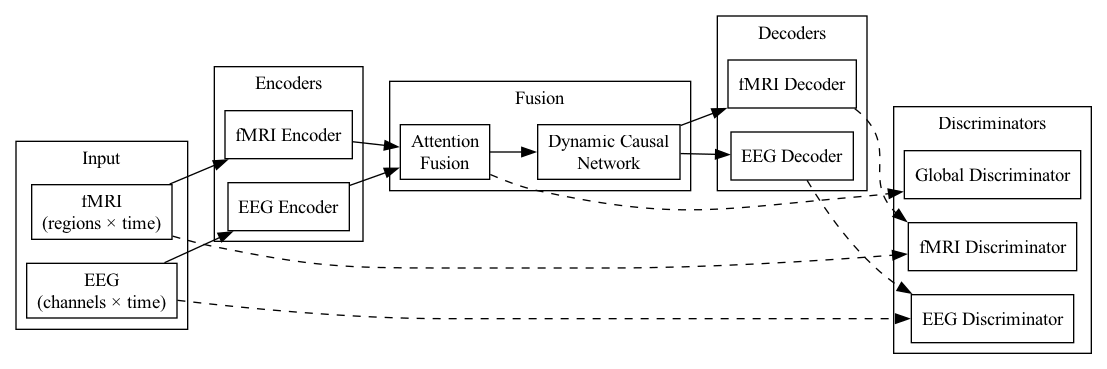

In [2]:
# Add new cell
from graphviz import Digraph
import os

# Create a new directed graph
dot = Digraph(comment='MCAN Architecture')
dot.attr(rankdir='LR')  # Left to right layout

# Add nodes
with dot.subgraph(name='cluster_0') as c:
    c.attr(label='Input')
    c.node('fmri_in', 'fMRI\n(regions × time)', shape='box')
    c.node('eeg_in', 'EEG\n(channels × time)', shape='box')

with dot.subgraph(name='cluster_1') as c:
    c.attr(label='Encoders')
    c.node('fmri_enc', 'fMRI Encoder', shape='box')
    c.node('eeg_enc', 'EEG Encoder', shape='box')

with dot.subgraph(name='cluster_2') as c:
    c.attr(label='Fusion')
    c.node('fusion', 'Attention\nFusion', shape='box')
    c.node('dcn', 'Dynamic Causal\nNetwork', shape='box')

with dot.subgraph(name='cluster_3') as c:
    c.attr(label='Decoders')
    c.node('fmri_dec', 'fMRI Decoder', shape='box')
    c.node('eeg_dec', 'EEG Decoder', shape='box')

with dot.subgraph(name='cluster_4') as c:
    c.attr(label='Discriminators')
    c.node('fmri_disc', 'fMRI Discriminator', shape='box')
    c.node('eeg_disc', 'EEG Discriminator', shape='box')
    c.node('global_disc', 'Global Discriminator', shape='box')

# Add edges
dot.edge('fmri_in', 'fmri_enc')
dot.edge('eeg_in', 'eeg_enc')
dot.edge('fmri_enc', 'fusion')
dot.edge('eeg_enc', 'fusion')
dot.edge('fusion', 'dcn')
dot.edge('dcn', 'fmri_dec')
dot.edge('dcn', 'eeg_dec')

# Discriminator connections
dot.edge('fmri_in', 'fmri_disc', style='dashed')
dot.edge('fmri_dec', 'fmri_disc', style='dashed')
dot.edge('eeg_in', 'eeg_disc', style='dashed')
dot.edge('eeg_dec', 'eeg_disc', style='dashed')
dot.edge('fusion', 'global_disc', style='dashed')

# Save and display
dot.render('mcan_architecture', format='png', cleanup=True)

# Display in notebook
from IPython.display import Image
Image('mcan_architecture.png')